In [2]:
import pickle
from zipfile import ZipFile
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [3]:
with ZipFile('data/9_way_dataset.zip', 'r') as zip:
    zip.printdir()
    # zip.extractall(path='/home/jipe/E208-Final-Project/data')
    zip.extractall()

with ZipFile('data/100_way_dataset.zip', 'r') as zip:
    zip.printdir()
    # zip.extractall(path='/home/jipe/E208-Final-Project/data')
    zip.extractall()

File Name                                             Modified             Size
9_way_dataset.pkl                              2023-10-19 21:18:44    161593492
File Name                                             Modified             Size
100_way_dataset.pkl                            2023-10-19 21:20:32    400855173


In [4]:
with open('9_way_dataset.pkl', 'rb') as f:
    data = pickle.load(f)

In [5]:
testarr = np.array(data[0][0])
testarr = np.append(testarr, np.zeros((64, 2)), axis=1)
testarr_int = testarr.astype(np.uint8)

print(testarr.shape)

(64, 64)


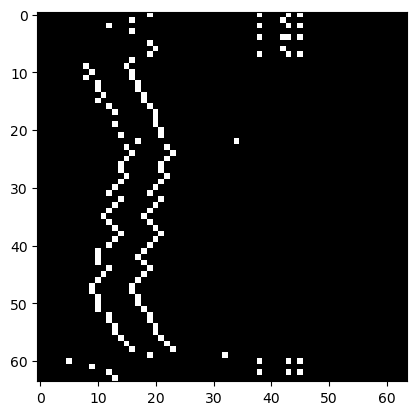

In [6]:
plt.imshow(testarr, cmap=cm.Greys_r)
plt.show()

In [7]:
len(data[6])

27999

In [8]:
data[5][0]

'Scriabin,_Aleksandr'

 # Some helper functions for tokenization

In [11]:
# Function to convert a binary list to an integer
def binary_to_int(binary_list):
    return int("".join(str(x) for x in binary_list), 2)

# Function to convert an integer to a Unicode character
def int_to_unicode(value):
    # Adjust the Unicode range if needed
    return chr(65 + value)

In [12]:
# Process each 2D array in your dataset
def process_dataset(dataset):
    sentences = []

    for array in dataset:
        words = []
        for row in array:
            # Split the 64-bit row into 8-bit chunks
            # chunks = [row[i:i + 8] for i in range(0, len(row), 8)]
            chunks = [row[i:i + 4] for i in range(0, len(row), 4)]
            
            # Convert each chunk to a Unicode character and form a word
            word = ''.join(int_to_unicode(binary_to_int(chunk)) for chunk in chunks)
            words.append(word)

        # Combine words to form a sentence
        sentence = ' '.join(words)
        sentences.append(sentence)

    return sentences

In [13]:
print(data[0][0])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [14]:
# Example dataset
# dataset = [np.random.randint(2, size=(64, 64)) for _ in range(10)] # 10 2D arrays for demonstration
dataset = [testarr_int]
# dataset = data[0] + data[2] + data[4]

# Process the dataset
sentences = process_dataset(dataset)

# Define the file path for the output file
output_file_path = 'test.txt'

# Write sentences to the file
with open(output_file_path, 'w', encoding='utf-8') as file:
    for sentence in sentences:
        file.write(sentence + '\n')

# Inform that the writing process is complete
print(f'Sentences written to {output_file_path}')

Sentences written to test.txt


In [15]:
len(sentences)

1

In [16]:
print(sentences[0])

AAAABAAAACBEAAAA AAAAIAAAAACAAAAA AAAIAAAAACBEAAAA AAAAIAAAAAAAAAAA AAAAAAAAACDEAAAA AAAABAAAAAAAAAAA AAAAAIAAAACAAAAA AAAABAAAACBEAAAA AAAAIAAAAAAAAAAA AAIBAAAAAAAAAAAA AAEAIAAAAAAAAAAA AAIAIAAAAAAAAAAA AACAEAAAAAAAAAAA AACAEAAAAAAAAAAA AABACAAAAAAAAAAA AACACAAAAAAAAAAA AAAIBAAAAAAAAAAA AAAEAIAAAAAAAAAA AAAAAIAAAAAAAAAA AAAEAIAAAAAAAAAA AAAAAEAAAAAAAAAA AAACAEAAAAAAAAAA AAAAEAAACAAAAAAA AAABACAAAAAAAAAA AAAAIBAAAAAAAAAA AAABACAAAAAAAAAA AAACAEAAAAAAAAAA AAACAEAAAAAAAAAA AAABACAAAAAAAAAA AAACAEAAAAAAAAAA AAAEAIAAAAAAAAAA AAAIBAAAAAAAAAAA AAACAEAAAAAAAAAA AAAEAIAAAAAAAAAA AAAIBAAAAAAAAAAA AABACAAAAAAAAAAA AAAIBAAAAAAAAAAA AAAEAIAAAAAAAAAA AAACAEAAAAAAAAAA AAAEAIAAAAAAAAAA AAAIBAAAAAAAAAAA AACACAAAAAAAAAAA AACAEAAAAAAAAAAA AACACAAAAAAAAAAA AAAIBAAAAAAAAAAA AABACAAAAAAAAAAA AACAEAAAAAAAAAAA AAEAIAAAAAAAAAAA AAEAIAAAAAAAAAAA AACAEAAAAAAAAAAA AACAEAAAAAAAAAAA AACACAAAAAAAAAAA AAAIBAAAAAAAAAAA AAAIBAAAAAAAAAAA AAAEAIAAAAAAAAAA AAAEAIAAAAAAAAAA AAACAEAAAAAAAAAA AAABACAAAAAAAAAA AAAAIBAAAAAAAA